# Data and Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the data
train_data = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv')
test_data = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv')

 

# Preprocess and split the data  

In [2]:
X = train_data.drop(['spam', 'ID'], axis=1)  # Remove target variable and ID column
y = train_data['spam']

 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Random Forest Train and eval 

In [3]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Evaluate the classifier
val_predictions = rf_classifier.predict(X_val)
accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9627329192546584


# predictions and file 

In [4]:
# Make predictions on the test set
test_features = test_data.drop('ID', axis=1)  # Remove ID column
test_predictions = rf_classifier.predict(test_features)

# Prepare submission file
submission_df = pd.DataFrame({'ID': test_data['ID'], 'spam': test_predictions})

# Save submission file
submission_df.to_csv('submission.csv', index=False)

# Visualizing  

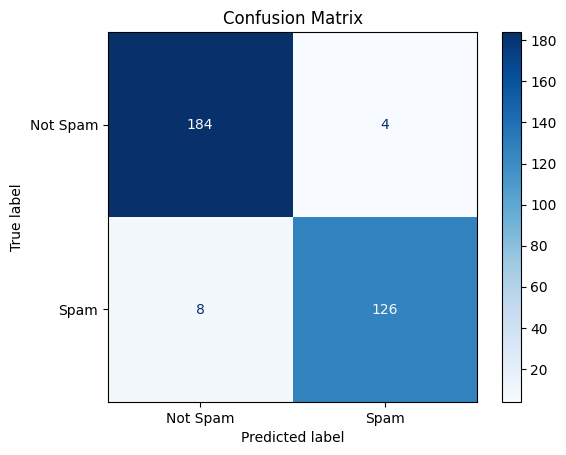

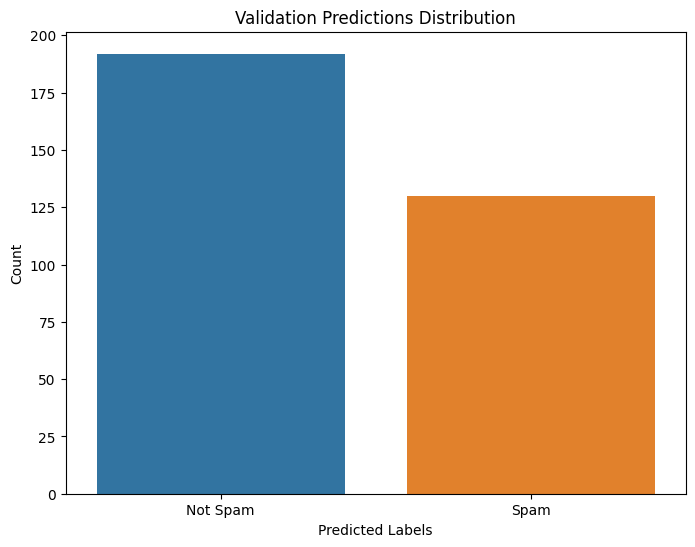

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, val_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Spam', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Visualizing the predictions (0 or 1) as a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x=val_predictions)
plt.title('Validation Predictions Distribution')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.show()
